# Topic Modelling using Sci-kit Learn

### Getting files from Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download therohk/million-headlines

million-headlines.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip *.zip

Archive:  million-headlines.zip
replace abcnews-date-text.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace abcnews-date-text.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: abcnews-date-text.csv   


# Downloading NLTK Packages

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Importing Libraries

In [ ]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

# Loading the dataset

In [ ]:
df=pd.read_csv('/content/abcnews-date-text.csv')

In [ ]:
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


We will drop the **'publish_date'** column as it is not required for Topic Modelling.

In [ ]:
df.drop(['publish_date'],axis=1,inplace=True)

In [ ]:
df.head(10)

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
5,ambitious olsson wins triple jump
6,antic delighted with record breaking barca
7,aussie qualifier stosur wastes four memphis match
8,aust addresses un security council over iraq
9,australia is locked into war timetable opp


In [ ]:
len(df)

1244184

# Text Preprocessing

We will use the following steps in processing.
1. Lemmatizer
2. Stop word removal
3. Removing words less than 3 characters


In [ ]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

The following text takes a long amount of time.

In [ ]:
%time
df['headline_cleaned_text']=df['headline_text'].apply(clean_text)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


In [ ]:
df.head()

,headline_text,headline_cleaned_text
0,aba decides against community broadcasting lic...,decides community broadcasting licence
1,act fire witnesses must be aware of defamation,fire witness must aware defamation
2,a g calls for infrastructure protection summit,call infrastructure protection summit
3,air nz staff in aust strike for pay rise,staff aust strike rise
4,air nz strike to affect australian travellers,strike affect australian traveller


Can see the difference after removal of stopwords and some shorter words. aslo the words have been lemmatized as in **'calls'--->'call'.**

Now drop the unpre-processed column.

In [ ]:
df.drop(['headline_text'],axis=1,inplace=True)

In [ ]:
df.head()

,headline_cleaned_text
0,decides community broadcasting licence
1,fire witness must aware defamation
2,call infrastructure protection summit
3,staff aust strike rise
4,strike affect australian traveller


Cross-verifying if our text has been processed properly.

In [ ]:
df['headline_cleaned_text'][10]

'australia contribute million iraq'

# Latent Semantic Analysis

Link - http://wordvec.colorado.edu/papers/Deerwester_1990.pdf

# Feature Extraction

Feature Extraction and creation of the Document-Term Matrix.

The DTM is filled using TFidf values.


In [ ]:
vect =TfidfVectorizer(stop_words=list(stop_words),max_features=1000)
# Solution
#https://stackoverflow.com/questions/75643277/how-can-i-solve-the-error-the-stop-words-parameter-of-tfidfvectorizer-must-be

In [ ]:
vect_text=vect.fit_transform(df['headline_cleaned_text'])

 We can now see the most frequent and rare words in the news headlines based on idf score. The lesser the value, more common is the word in the news headlines.

In [ ]:
print(vect_text.shape)
print(vect_text)

(1244184, 1000)
  (0, 507)	0.7835866365343614
  (0, 179)	0.6212825307738553
  (1, 575)	0.6349880865942004
  (1, 982)	0.6342927179400741
  (1, 322)	0.4409794528678519
  (2, 849)	0.6547639702280009
  (2, 680)	0.6238273694257671
  (2, 123)	0.4267593659740731
  (3, 742)	0.4532976215030844
  (3, 841)	0.4902042737088293
  (3, 55)	0.5231144394497186
  (3, 825)	0.5296907773564236
  (4, 57)	0.6353226814247142
  (4, 841)	0.7722467808073474
  (5, 977)	1.0
  (6, 708)	1.0
  (7, 542)	0.5181893045688648
  (7, 345)	0.47999299809054896
  (7, 960)	0.536081350460646
  (7, 54)	0.4622805988820778
  (8, 452)	0.42971935152299656
  (8, 201)	0.35008746491576936
  (8, 774)	0.4480146252705608
  (8, 12)	0.5211813266275572
  (8, 55)	0.469502892593777
  :	:
  (1244176, 523)	0.7819690365488077
  (1244176, 62)	0.6233172754536243
  (1244177, 994)	0.6308823897546781
  (1244177, 659)	0.7758784765009443
  (1244178, 174)	0.6039082400840834
  (1244178, 60)	0.6158398551561406
  (1244178, 373)	0.5060001090511829
  (1244179, 

In [ ]:
idf=vect.idf_

police is most common and forecast is least common among the news headlines

Create a dictionary `dd` by zipping the feature names obtained from a vectorizer `vect.get_feature_names_out()` with inverse document frequency (IDF) values (idf). Then, it sorts the keys (feature names) of the dictionary dd based on their IDF values in ascending order.

In [ ]:
dd=dict(zip(vect.get_feature_names_out(), idf))
l=sorted(dd, key=(dd).get)

print(l[0],l[-1])
print(dd['police'])
print(dd['forecast'])

police walk
4.443299144410428
7.91597505058549


We can therefore see that on the basis of the **idf value** , **'police'** is the **most frequent** word while **'forecast'** is **least frequently** occuring among the news.

# LSA Model


In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [ ]:
print(lsa_top)
print(lsa_top.shape)

[[ 1.61076339e-04  1.03241034e-02  2.13718665e-02 ... -2.63818011e-03
   2.98605658e-03 -2.23336827e-03]
 [ 7.70527787e-04  5.11253321e-02  7.27846132e-02 ...  1.50815019e-01
  -8.41540804e-02  1.08404965e-02]
 [ 5.59199460e-04  3.71451404e-02  9.40825856e-02 ...  2.99762320e-01
  -4.67794715e-02 -1.78673042e-02]
 ...
 [ 1.52236963e-04  1.13324316e-02  2.36916623e-02 ...  7.11851174e-04
   7.40009415e-03 -4.71156851e-03]
 [ 3.36489824e-04  2.80750494e-02  2.45473562e-02 ...  2.39687089e-03
   3.28186546e-02 -1.18650145e-02]
 [ 3.57211132e-04  2.00344330e-02  4.13513673e-02 ...  2.36488433e-03
   1.39510835e-02 -3.79608346e-03]]
(1244184, 10)


In [ ]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  0.01610763387661188
Topic  1  :  1.0324103438360606
Topic  2  :  2.137186645950668
Topic  3  :  -0.762522857781075
Topic  4  :  -1.0943428328948581
Topic  5  :  -0.6906212140685632
Topic  6  :  0.053735723458157574
Topic  7  :  -0.2638180108737358
Topic  8  :  0.2986056580443063
Topic  9  :  -0.22333682738916016


Similalry for other documents we can do this. However note that values dont add to 1 as in LSA it is not probabiltiy of a topic in a document.

In [ ]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 2.77432475e-05  6.35912934e-05  6.82052976e-05 ...  1.27805339e-04
   3.74182406e-05  5.22850655e-05]
 [ 1.05886216e-03  1.30603435e-03  1.54243773e-03 ...  2.74429068e-03
   2.28582531e-03  2.62491583e-03]
 [ 3.25748651e-03  4.05123655e-03  4.89137619e-03 ...  8.60323665e-03
   4.45700128e-03  4.84595536e-03]
 ...
 [ 9.70043882e-05 -9.85910225e-05  9.45915844e-05 ... -1.87287288e-04
   1.36983711e-03 -1.60473169e-04]
 [ 2.87156904e-03  2.93943167e-03  4.05615743e-03 ...  2.20548296e-03
   3.50032803e-05  5.64644592e-04]
 [-1.85271138e-04 -1.23516490e-04 -2.45466987e-05 ... -1.32027552e-04
   6.86795900e-04 -1.20255015e-04]]


#### Now e can get a list of the important words for each of the 10 topics as shown. For simplicity here I have shown 10 words for each topic.

In [ ]:
# most important words for each topic

# This line retrieves the feature names (words or terms) from the vectorizer vect
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    # This line combines the vocabulary (feature names) with the corresponding component values for the current topic.
    vocab_comp = zip(vocab, comp) # It pairs each term with its importance score in the topic.
    # Sorts the term-component pairs based on their importance scores in descending order and selects the top 10 terms.
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    # The script then prints the topic number (index) along with the top 10 terms for that topic.
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
interview extended michael john david smith james police andrew mark 

Topic 1: 
police death woman fire say crash court call probe murder 

Topic 2: 
say australia plan council call back govt fire court australian 

Topic 3: 
say police minister need trump must expert wont labor needed 

Topic 4: 
australia say police south world china coronavirus india test first 

Topic 5: 
court woman face murder charged fire charge death accused crash 

Topic 6: 
fire house plan home crew australia govt sydney damage blaze 

Topic 7: 
call fire say medium house home death australian inquiry spark 

Topic 8: 
australian woman crash year open dy charged back killed world 

Topic 9: 
back court police australian fight hit fire claim year track 



---

## Latent Dirichlet Allocation (LDA)  

LDA is the most popular technique.**The topics then generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.**

**To understand the maths it seems as if knowledge of Dirichlet distribution (distribution of distributions) is required which is quite intricate and left for now.**

More here - https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf

`n_components` is the number of topics.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1)

In [ ]:
lda_top=lda_model.fit_transform(vect_text)

In [ ]:
print(lda_top.shape)
print(lda_top)

(1244184, 10)
[[0.0415823  0.0415823  0.0415823  ... 0.0415823  0.62575927 0.0415823 ]
 [0.19959635 0.03690472 0.03689683 ... 0.03689683 0.03689683 0.03689683]
 [0.03696378 0.03696378 0.19471019 ... 0.03696378 0.50957953 0.03696378]
 ...
 [0.04142418 0.33877314 0.04142418 ... 0.04142418 0.04142418 0.04142418]
 [0.04151834 0.04151834 0.04151834 ... 0.04151834 0.36011814 0.04151834]
 [0.20265722 0.03334462 0.03334462 ... 0.03334462 0.03334462 0.03334462]]


In [ ]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)

1.0


Note that the values in a particular row adds to 1. This is beacuse each value denotes the % of contribution of the corressponding topic in the document.

In [ ]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  4.158230366964279 %
Topic  1 :  4.158230366976006 %
Topic  2 :  4.158230366969732 %
Topic  3 :  4.1582303669724 %
Topic  4 :  4.1582303669721075 %
Topic  5 :  4.1582303669718925 %
Topic  6 :  4.158230366967037 %
Topic  7 :  4.158230366968324 %
Topic  8 :  62.5759266972693 %
Topic  9 :  4.158230366968913 %


As we can see Topic 7 & 8 are dominantly present in document 0.



In [ ]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[1.00001363e-01 1.00000749e-01 1.01861138e+03 ... 1.00010968e-01
  1.00004927e-01 1.00006924e-01]
 [1.00002223e-01 1.00001176e-01 1.00000832e-01 ... 1.00008798e-01
  1.00001420e-01 1.00005772e-01]
 [1.00000381e-01 1.00000777e-01 1.00001103e-01 ... 1.00006172e-01
  1.00001393e-01 1.00004973e-01]
 ...
 [1.00001183e-01 1.00001474e-01 1.00001614e-01 ... 1.00004791e-01
  1.00001709e-01 1.00004789e-01]
 [1.00000184e-01 5.31736977e+02 1.00001697e-01 ... 2.87310871e+03
  2.07560446e+02 1.00005909e-01]
 [1.00000380e-01 1.00001909e-01 1.00001589e-01 ... 1.00006382e-01
  1.00002813e-01 1.00002584e-01]]
(10, 1000)


Most important words for a topic. (say 10 this time)

In [ ]:
# This line retrieves the feature names (words or terms) from the vectorizer vect
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    # This line combines the vocabulary (feature names) with the corresponding component values for the current topic.
    vocab_comp = zip(vocab, comp) # It pairs each term with its importance score in the topic.
    # Sorts the term-component pairs based on their importance scores in descending order and selects the top 10 terms.
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    # The script then prints the topic number (index) along with the top 10 terms for that topic.
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
coronavirus covid case fire brisbane could house crash hotel street 

Topic 1: 
police victoria restriction open bushfire island premier water finance storm 

Topic 2: 
australia queensland call health indigenous north farmer student labor high 

Topic 3: 
say home change coast canberra worker former gold tasmanian three 

Topic 4: 
sydney woman government border first live help speaks regional climate 

Topic 5: 
election record south family tasmania school death found dead president 

Topic 6: 
donald court child adelaide victorian show national perth federal report 

Topic 7: 
australian trump year china news minister back trial charged andrew 

Topic 8: 
melbourne people community time final royal rise story commission game 

Topic 9: 
vaccine world state life market morrison business attack scott test 



#### To better visualize words in a topic we can see the word cloud. For each topic top 50 words are plotted.

In [ ]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  # Empty string to store important words for a topic
  imp_words_topic=""
  # Extracts the topic's components from the LDA model
  comp=lda_model.components_[index]
  # This line combines the vocabulary (list of words) with the corresponding component values for the specified topic
  vocab_comp = zip(vocab, comp)
  # Sorts in desc and selects top 50 words
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  # The following for loop iterates through the sorted words and appends them to the imp_words_topic string, separated by spaces
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]
  #This line creates a WordCloud object with a specified width and height
  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

Word Cloud for topic 0

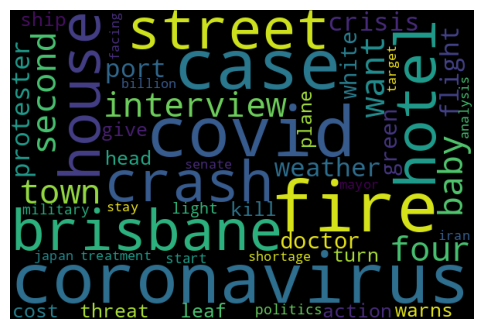

In [ ]:
draw_word_cloud(0)

Word Cloud for topic 1

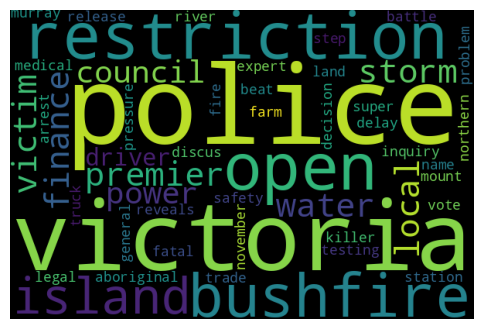

In [ ]:
draw_word_cloud(1)

---


### Try an implementation of BertTopic
Link - https://maartengr.github.io/BERTopic/index.html

---